**Dataset Netflix:** El dataset muestra reelevamiento de Series, pelìculas y cortos de Netflix. Se obtuve en Kaggle. Se eleige este dataset por ser un tema de inteés que cumple con los requisitos de filas y columnas para luego entrenar el modelo de ML.





**Resumen del Dataset**
El dataset contiene 7008 entradas relacionadas con títulos de Netflix y tiene las siguientes columnas clave:



*  **imdb_id:** Identificador único de cada título.
*  **title:** Título de la película o serie.
*   **popular_rank:** Clasificación de popularidad.
*   **certificate:** Clasificación por edades (ej. 15, 18).
*   **startYear, endYear:** Año de lanzamiento y de finalización para las series de TV.
*   **episodes:** Número de episodios para series de TV.
*   **runtime:** Duración de la película o episodio.
*   **type:** Indica si es una película o serie de TV.
*   **rating:** Calificación en IMDb.
*   **numVotes:** Número de votos para la calificación.
*   **genres:** Géneros asociados con el título.
*   **isAdult:** Indica si el contenido es para adultos (1 = contenido adulto).
*   **cast:** Principales miembros del elenco.


**Hipótesis 1:**Las series de TV tienden a recibir más votos en comparación con otros tipos de títulos disponibles en Netflix.
Esto se puede probar comparando el número de votos entre los diferentes tipos de títulos.     **Hipótesis 2:**Las peliculas tienden a recibir más votos en comparación con otros tipos de títulos disponibles en Netflix.
Esto se puede probar comparando el número de votos entre los diferentes tipos de títulos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ajusta la ruta al archivo en mi unidad de Google Drive
file_path = '/content/drive/MyDrive/DATA_SCIENCE_PARTE_1/Pre_Entrega_1 - Victoria Queipo /netflix.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas para confirmar que se ha cargado correctamente
df.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       6995 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

El comando **df.info()** muestra:

* Hay un total de 7008 entradas.
*   Columnas clave como certificate, episodes, y rating tienen valores faltantes.
* Algunas columnas son categóricas (como type y genres), mientras que otras son numéricas (como rating y numVotes).

In [ ]:
df.columns

Index(['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'genres', 'isAdult', 'cast',
       'image_url'],
      dtype='object')

In [ ]:
df.shape

(7008, 19)

In [ ]:
df.describe()

,startYear,endYear,episodes,rating,numVotes,isAdult
count,6493.000000,1126.000000,2304.000000,6000.000000,6.000000e+03,7008.0
mean,2015.606653,2016.613677,38.510851,6.696400,1.961778e+04,0.0
std,7.855886,5.195806,237.894838,1.209824,7.975237e+04,0.0
min,1932.000000,1969.000000,1.000000,1.700000,5.000000e+00,0.0
25%,2015.000000,2016.000000,8.000000,6.000000,3.040000e+02,0.0
50%,2017.000000,2018.000000,14.000000,6.800000,1.312000e+03,0.0
75%,2019.000000,2019.000000,30.000000,7.600000,6.166750e+03,0.0
max,2022.000000,2022.000000,8358.000000,9.700000,1.697849e+06,0.0


Analizando el df.describe podemos ver que por ejemplo con respecto a cantidad de episodios la mediana es menor que la media por lo tanto la distribución de estos datos esta sesgada a la derecha generando una asimetrìa positiva. Esto significa que, aunque la mayoría de las series tienen un número más bajo de episodios (reflejado por la mediana), hay algunas series con un número significativamente mayor de episodios que aumentan la media. En el caso de número de votos vemos que la media y la mediana no están tan alejadas, la distribución de esta variable podrìa considerarse más simétrica que la anterior.  

In [ ]:
df.isnull().sum()

,0
imdb_id,0
title,0
popular_rank,0
certificate,4599
startYear,515
endYear,5882
episodes,4704
runtime,2
type,2
orign_country,0


**Consigna**: Se realizarán 6 gráficos, 3 con **Seaborn** y 3 con **Matplotlib**

Se genera un Histograma que muestra la frecuencia de la variable rating por tipo de tìtulo (Seaborn)

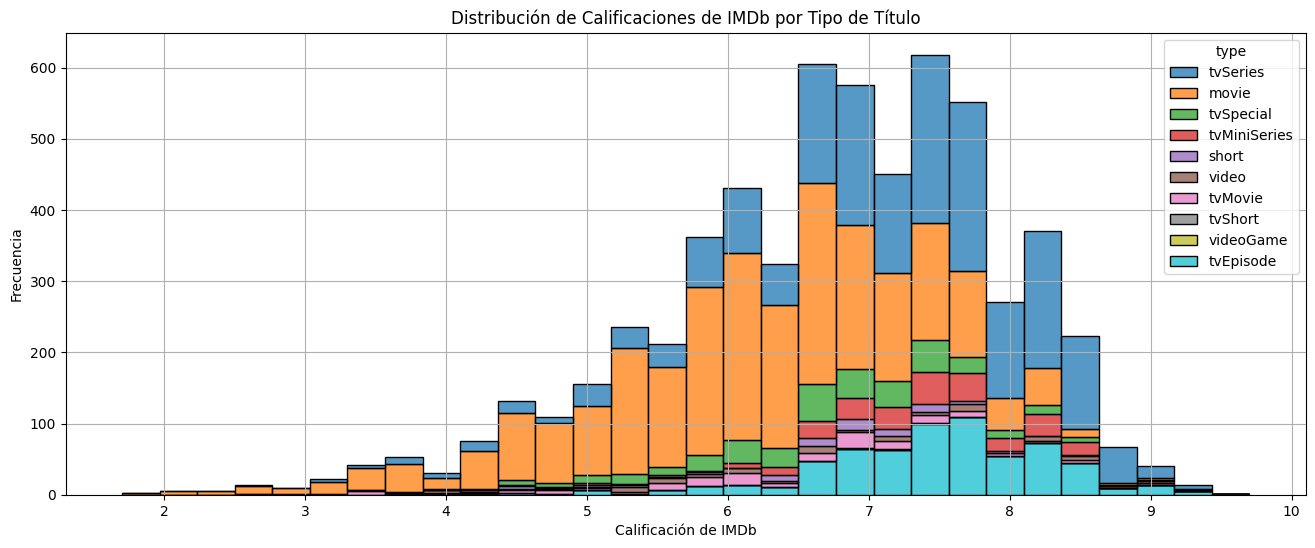

In [ ]:
# Crear un histograma para la variable 'rating'
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='rating', hue='type', multiple='stack', bins=30)

# Personalizar
plt.title('Distribución de Calificaciones de IMDb por Tipo de Título')
plt.xlabel('Calificación de IMDb')
plt.ylabel('Frecuencia')
plt.grid(True)

# Mostrar gráfico
plt.show()

este gráfico nos permite analizar que los títulos de netflix que son calificados con mayor frecuencia son las series de tv en su mayoría seguido de las películas. A su vez en este histograma al analizarlo vemos que el histograma tiene un sesgo más bien negativo.

Se genera un boxplot para comparar la distribución de las calificaciones con la distribución del número de votos.  (Seaborn)


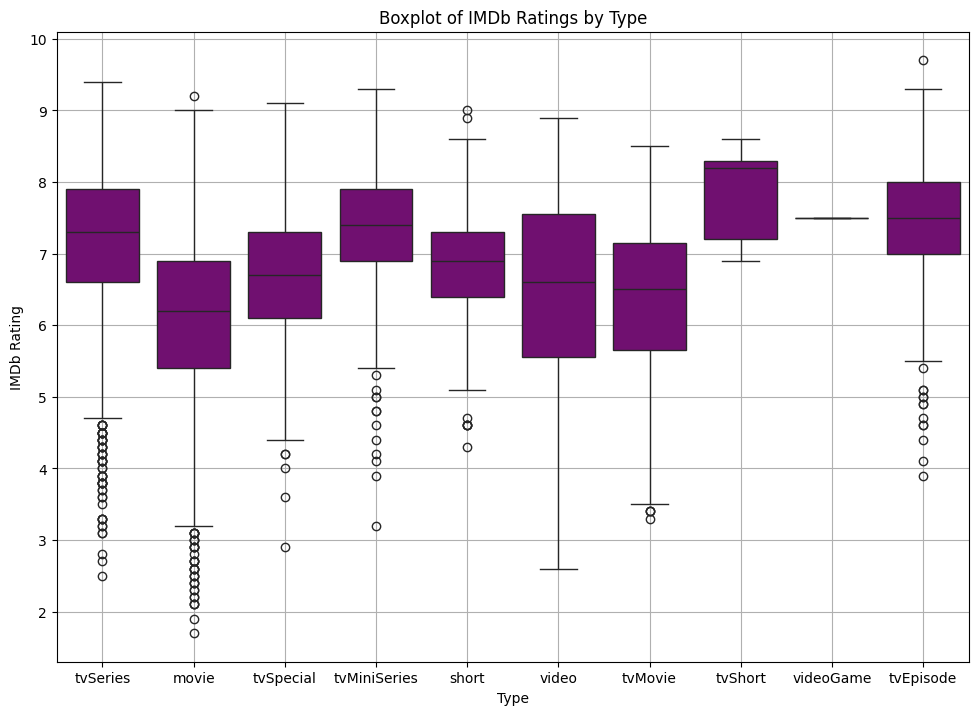

In [ ]:
# Crear un boxplot para 'rating' y 'numVotes'
plt.figure(figsize=(40,18))

# Graficar
plt.subplot(2, 3, 3)
sns.boxplot(x="type", y="rating", data=df, color='purple')
plt.title("Boxplot of IMDb Ratings by Type")

# Personalizar
plt.xlabel('Type')
plt.ylabel('IMDb Rating')
plt.grid(True)

# Mostrar gráfico
plt.show()

Al analizar este gráfico podemos ver por un lado muchos outliers en algunas categorías de títulos de netflix como películas y episodios de tv, que han recibido calificaciones inusualmente ajas en comparación con la mayotía de los títulos.

Se genera un Barplot de promedio de calificaciones por tipo de contenido en netflix (Seaborn)

<ipython-input-45-b63e8ddc8ea7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='rating', data=df_filtered , ci=None, palette='viridis')  # Usa palette para color
<ipython-input-45-b63e8ddc8ea7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='rating', data=df_filtered , ci=None, palette='viridis')  # Usa palette para color


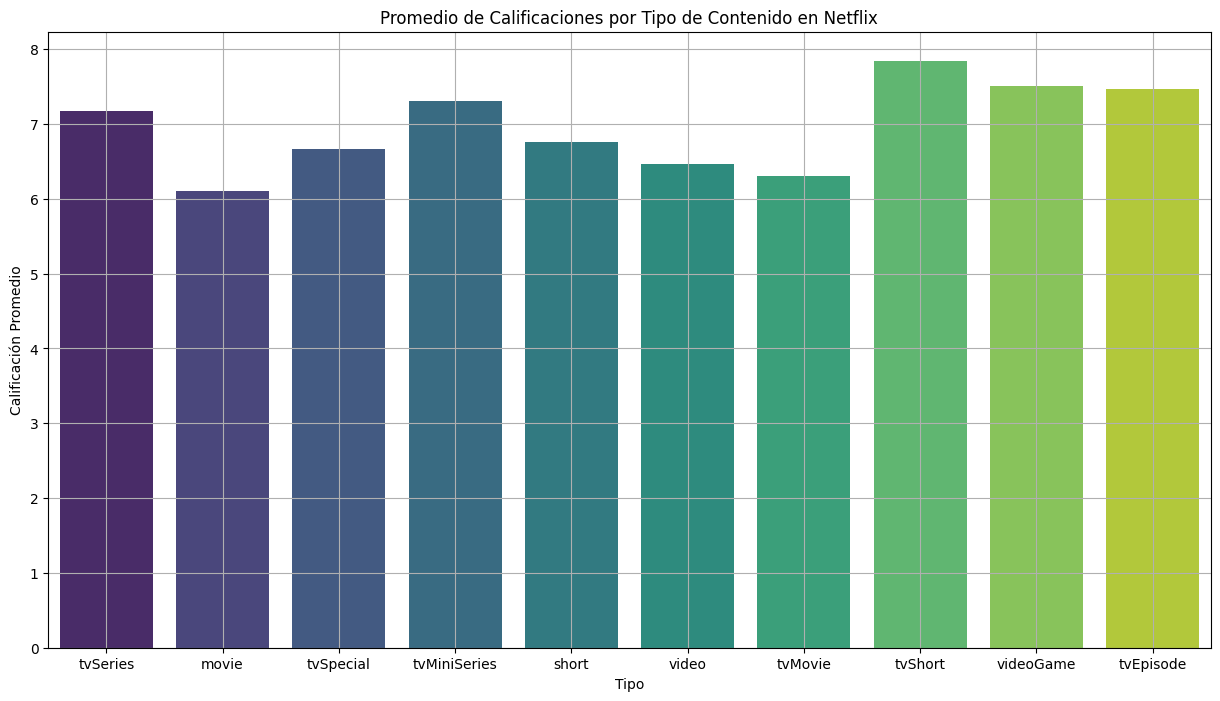

In [ ]:
# Crear un barplot para 'type' y 'rating'
plt.figure(figsize=(15,8))
sns.barplot(x='type', y='rating', data=df_filtered , ci=None, palette='viridis')  # Usa palette para color

# Personalizar
plt.title('Promedio de Calificaciones por Tipo de Contenido en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Calificación Promedio')
plt.grid(True)

# Mostrar gráfico
plt.show()

Este gráfico muestra el rating de cada uno de los tipos de títulos vigentes en el dataset. Se suma un fragemento de código ci=None que no se ha visto en clase para que no me muestre el intervalo de confianza en el gráfico de barras y asi poder obtener una imágen más limpia y de fácil interpretación. Podemos ver que el tipo de título TvSort es el que tiene las mejores calificaciones en promedio y movie el que tiene las calificaciones más bajas en promedio.

Barplot: número de títulos de Netflix por tipo de título (Matplotlib)

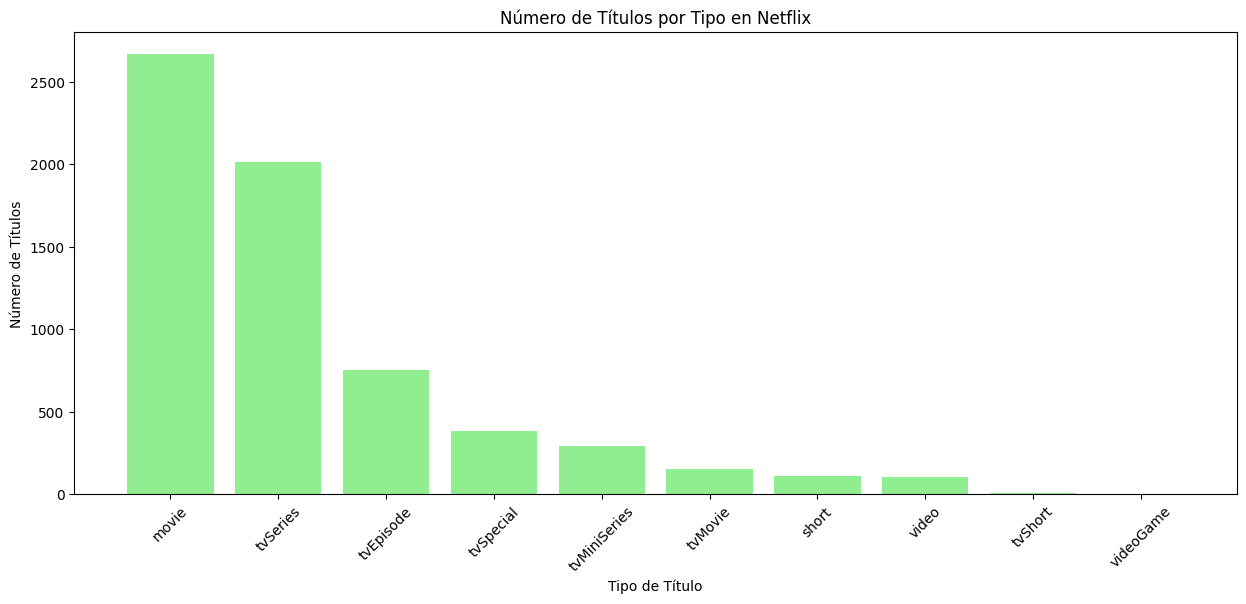

In [ ]:
# Contar el número de títulos por tipo
title_counts = df['type'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(title_counts.index, title_counts.values, color='lightgreen')

# Personalizar
plt.title('Número de Títulos por Tipo en Netflix')
plt.xlabel('Tipo de Título')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X

# Mostrar gráfico
plt.show()

Este gráfico nos permite ver que cantidad de títulos hay en este dataset de acuerdo con el tipo de título. Observamos que la mayor cantidad de títulos son películas.

In [ ]:
# Contar el número de títulos por país
country_counts = df['orign_country'].value_counts()

# Mostrar los resultados
print(country_counts)

orign_country
United States     2691
United Kingdom     495
Japan              400
South Korea        312
-                  271
                  ... 
Cyprus               1
Croatia              1
Bahamas              1
Paraguay             1
Jordan               1
Name: count, Length: 82, dtype: int64


Piechart: Gráfico de torta que muestra los 5 países con más títulos en Netflix.(Matplotlib)

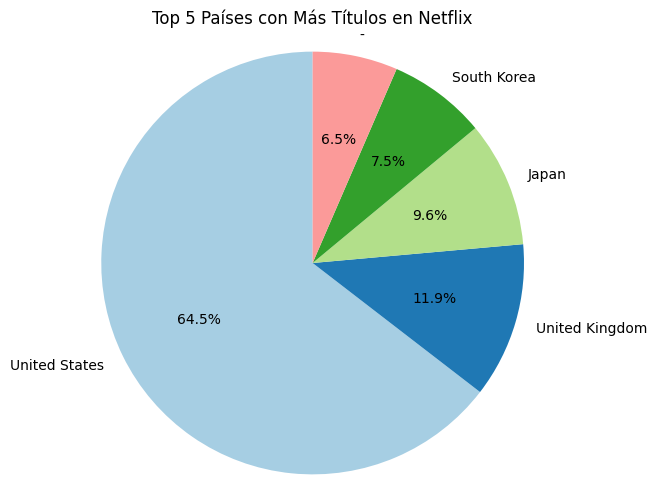

In [ ]:
# Contar el número de títulos por país
country_counts = df['orign_country'].value_counts()

# Seleccionar los 5 países con más títulos
top_5_countries = country_counts.head(5)

# Crear un pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Personalizar
plt.title('Top 5 Países con Más Títulos en Netflix')
plt.axis('equal')  # Para que el pie chart sea un círculo

# Mostrar gráfico
plt.show()

En el gráfico de torta del top 5 de países con más titulos en Netflix vemos que Estados unidos lidera este ranking, seguido de Reino Unido, Japón y Corea del Sur. En el puesto 5 vemos el caracter -, podemos inferir que el puesto 5 de este ranking lo lideran los títulos cuyo país no fue indicado y en vez de dejar el campo vacío en el dataset colocaron el caracter '-'. Es una característica del dataset a tener en cuenta por ejemplo a la hora de reemplazar nulos, podríamos evaluar que hacer con estos casos.

Scatterplot: Relación entre calificación y número de votos para títulos del 2019 en Netflix (Matplotlib)

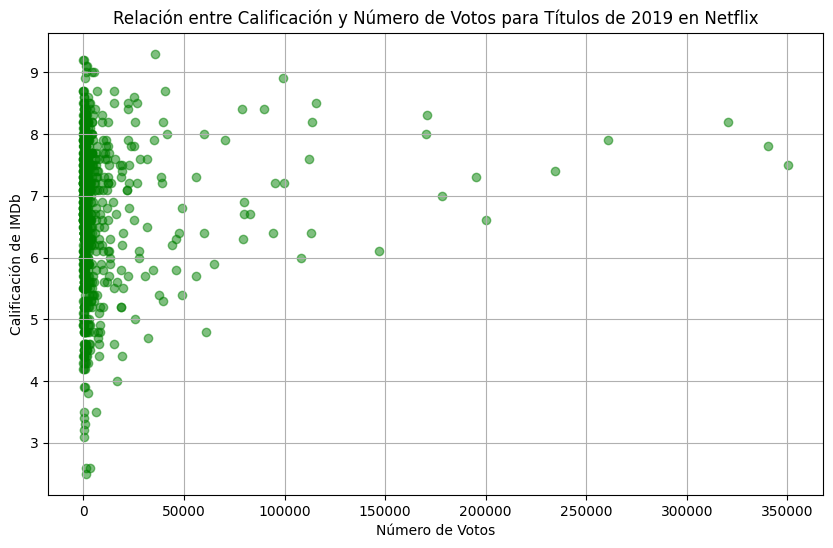

In [ ]:
# Filtrar los títulos que se estrenaron en 2019
df_2019 = df[df['startYear'] == 2019]

# Crear un scatter plot (número de votos vs. calificación para títulos de 2019)
plt.figure(figsize=(10, 6))
plt.scatter(df_2019['numVotes'], df_2019['rating'], alpha=0.5, color='green')

# Personalizar
plt.title('Relación entre Calificación y Número de Votos para Títulos de 2019 en Netflix')
plt.xlabel('Número de Votos')
plt.ylabel('Calificación de IMDb')
plt.grid(True)

# Mostrar gráfico
plt.show()

Lo que puedo observar en este gráfico es que al haber muchos puntos concenrtrados en el eje Y significa que hay muchos títulos con un número bajo de votos y probablemente también calificaciones. Esto puede ser común, ya que muchos títulos pueden no ser ampliamente conocidos. Me resuelta dificil de interpretar este gráfico ya que no puedo observar una correlación evidente.

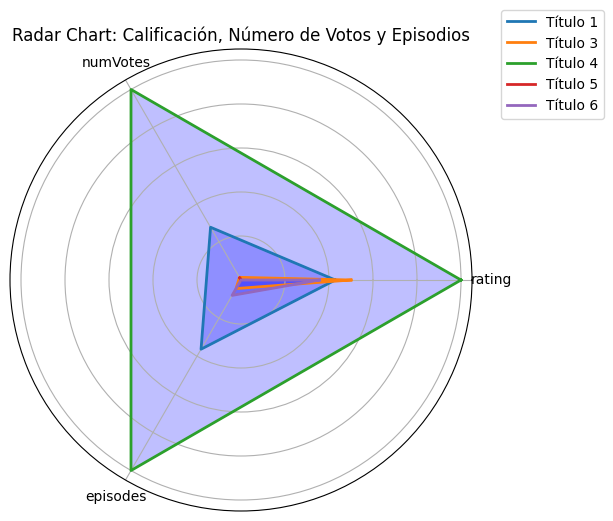

In [ ]:
# Limpiar los datos: asegurarse de que no haya valores nulos
df_clean = df[['rating', 'numVotes', 'episodes']].dropna()

# Seleccionar una muestra de datos (por ejemplo, los primeros 5 títulos para visualización)
df_sample = df_clean.head(5)

# Normalizar los datos para que todos estén en la misma escala (entre 0 y 1)
df_normalized = df_sample.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Preparar los datos para el radar chart
labels = df_normalized.columns
num_vars = len(labels)

# Crear los ángulos para el radar chart (uno por cada variable)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repetir el primer ángulo al final para cerrar el gráfico
angles += angles[:1]

# Crear la figura
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar una línea para cada título
for i, row in df_normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # Repetir el primer valor al final para cerrar el gráfico
    ax.fill(angles, values, alpha=0.25, color='blue')
    ax.plot(angles, values, linewidth=2, label=f'Título {i+1}')

# Ajustar etiquetas
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Agregar leyenda
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Mostrar gráfico
plt.title('Radar Chart: Calificación, Número de Votos y Episodios')
plt.show()

**A partir del análisis y visualización del dataset de Netflix, se pueden derivar las siguientes conclusiones relacionadas con las dos hipótesis planteadas:**

**Hipótesis 1:** Las series de TV tienden a recibir más votos en comparación con otros tipos de títulos en Netflix.
* Visualización de datos relevantes: Se pueden utilizar gráficos como el scatterplot entre "numVotes" y "rating", y el boxplot que compara los votos por tipo de título.
* En el scatterplot que muestra la relación entre "rating" y "numVotes" de series lanzadas en 2019, podemos observar que aunque hay una gran concentración de títulos con pocos votos, algunos títulos (series) tienden a recibir una mayor cantidad de votos, lo que puede apoyar la idea de que los programas de TV capturan una mayor cantidad de participación del público en términos de votación.
* En el boxplot de calificaciones IMDb por tipo de título, se muestra que las series de TV tienen una mayor dispersión de calificaciones, pero también hay muchos outliers. Esto puede indicar que algunos títulos tienen un comportamiento anómalo, tal vez debido a su popularidad, pero no necesariamente confirma que las series de TV obtienen más votos.

**Hipótesis 2:** Las películas tienden a recibir más votos en comparación con otros tipos de títulos en Netflix.
* Análisis: Se puede observar una gran variedad de títulos de películas en la plataforma, y si analizamos el gráfico de barras que muestra el número de títulos por tipo, hay una cantidad considerable de películas. Sin embargo, si nos enfocamos en los gráficos como el scatterplot o el boxplot que muestran "numVotes" frente a "rating", no parece haber una clara tendencia de que las películas reciban muchos más votos en comparación con las series.
* En general, no hay una diferencia significativa entre películas y series en cuanto a la cantidad de votos, aunque la hipótesis podría ser válida en algunos casos.

**Conclusión:**
En función de los gráficos y visualizaciones analizadas, no hay evidencia concluyente de que una de las hipótesis (series o películas reciban más votos) se cumpla totalmente. Ambas categorías muestran una considerable cantidad de títulos con votos altos y bajos. Sin embargo, parece que algunos títulos de series de TV tienen un mayor rango de participación en comparación con las películas, aunque los outliers y la dispersión pueden sesgar los resultados.
Este análisis sugiere que se podrían profundizar más las hipótesis segmentando mejor los tipos de títulos y categorías específicas (géneros, regiones, años de lanzamiento) para obtener conclusiones más claras.

En el resumen inicial del dataset, mencionamos algunas de las variables más relevantes:

**rating:** Calificación en IMDb.
**numVotes:** Número de votos recibidos.
**type:** Tipo de título (serie, película, corto).
**episodes:** Número de episodios (para series).
**runtime:** Duración de la película o episodio.
**genres:** Género del título.
*pregunta clave:* ¿Estas variables fueron útiles para responder a tus hipótesis o hubo alguna que no proporcionó información relevante?

Evaluamos entonces la utilidad de cada variable:

**rating y numVotes:** Ambas son variables esenciales para probar la hipótesis de cuántos votos reciben las series o películas. Los gráficos como el scatterplot entre estas dos variables nos han proporcionado información relevante.

**Conclusión:** Mantenemos estas variables, ya que son centrales para la mayoría de los análisis.
**type:** El tipo de título (serie, película, corto) ha sido clave para segmentar los análisis. Se utilizó en histogramas, boxplots y scatterplots, lo que permitió visualizar las diferencias entre los tipos de títulos.

**Conclusión:** Mantenemos esta variable, ya que fue fundamental para analizar las diferencias entre series y películas.

**episodes:** Aunque útil para analizar series, no todas las entradas del dataset son series, y por lo tanto, la variable no se puede aplicar uniformemente a todo el conjunto de datos.

**Conclusión:** La mantenemos porque podría ser útil en análisis futuros más específicos de series, pero no es relevante para el conjunto completo del dataset.
**runtime:** La duración de las películas o episodios es interesante, pero no parece haber jugado un papel importante en los análisis hasta ahora. En muchos casos, la duración puede no estar directamente relacionada con los votos o calificaciones, lo que la hace menos útil para probar tus hipótesis.

**Conclusión:** Descartar o no priorizamos esta variable para los análisis actuales, a menos que se realice un análisis específico de duración vs. popularidad.
**genres:** Aunque se mencionó inicialmente, parece que esta variable no ha sido utilizada en los gráficos. Los géneros podrían ofrecer una segmentación adicional interesante (por ejemplo, comparar el número de votos o calificaciones por género), pero no se ha explorado en profundidad.

**Conclusión:** Se podría incluir en análisis futuros. Si no, se puede descartar.

Revalidamos entonces la sección de variables:

* Mantenemos rating, numVotes y type como variables clave. Son esenciales para los análisis realizados y aportan información directa para probar o refutar las hipótesis.

* Mantenemos episodes solo para el análisis de series, pero consideramos que no aplica a todo el dataset.

* Descartamos runtime ya que no nos centramos en un análisis de duración y su relación con popularidad o calificaciones.

* Dejamos como opción tomar la variable genres. Si bien no tiene un impacto claro en mis análisis, podríamos explorarla en análisis adicionales.

**Conclusión final de mis variables**
Luego de haber realizado los gráficos y análisis, la mayoría de las variables clave iniciales (rating, numVotes, type) se justifican como relevantes. Variables como runtime pueden ser descartadas por no haber aportado información significativa en este contexto. Además, podríamos considerar agregar otras variables (como genres) si decidimos hacer análisis más segmentados.

# Entrega Final
Objetivo comercial: aplicaremos un algoritmo de clasificación al dataset de títulos de Netflix con varios objetivos pero con la intentción principal de optimizar la recomendación de contenido y mejorar la retención de usuarios. Al predecir el tipo de título (por ejemplo, película o serie) en función de variables como duración, géneros, calificaciones y país de origen, la empresa podría:

**Personalizar la experiencia de usuario:** Utilizar la predicción del tipo de título para sugerir contenido más alineado con las preferencias de cada usuario. Si el modelo identifica que un usuario prefiere cierto tipo de contenido (como películas de corta duración o series de género específico), puede priorizar este tipo en las recomendaciones.

**Segmentación de contenido:** Netflix podría adaptar campañas de marketing en función de las predicciones del tipo de contenido que atraen a diferentes segmentos de usuarios. Esto permitiría dirigirse a audiencias con recomendaciones específicas, maximizando la relevancia del contenido.

**Análisis de tendencias de consumo:** Conocer el tipo de contenido que prefiere cada usuario puede ayudar a identificar patrones y tendencias de consumo. Esto permitiría a Netflix optimizar su catálogo y priorizar adquisiciones o producciones propias basadas en las preferencias identificadas.

Para lograr estos objetivos comenzaremos entrenando un algoritmo de clasificaciòn de tipo RandomForest, aplicaremos en conjunto PCA y luego RFE como mètodos de reducciòn de la dimensionalidad y posterior feature selection. Usar ambos métodos, PCA y RFE, permite reducir la dimensionalidad de manera efectiva mientras se conserva la información relevante para el modelo. Primero, PCA transforma las variables en componentes principales que capturan la mayor variabilidad de los datos, eliminando redundancia y ruido. Esto simplifica el dataset sin perder información esencial, facilitando el análisis y el procesamiento.

Luego, aplicar RFE sobre estos componentes selecciona solo aquellos que tienen mayor importancia predictiva para el modelo final. Así, obtenemos un conjunto de características optimizado tanto en términos de la información capturada (gracias a PCA) como en relevancia para el modelo (gracias a RFE). Esto mejora la eficiencia del modelo, reduciendo el tiempo de entrenamiento y el riesgo de sobreajuste, al tiempo que mejora la capacidad de generalización.

In [ ]:
# Crear un nuevo dataframe excluyendo las columnas 'certificate', 'episodes' y 'endYear'
df_clean = df.drop(columns=['certificate', 'episodes', 'endYear'])

# Eliminar filas con valores nulos en df_clean
df_clean = df_clean.dropna()

# Verificar si hay valores nulos en df_clean
print(df_clean.isnull().sum())

imdb_id          0
title            0
popular_rank     0
startYear        0
runtime          0
type             0
orign_country    0
language         0
plot             0
summary          0
rating           0
numVotes         0
genres           0
isAdult          0
cast             0
image_url        0
dtype: int64


In [ ]:
df_clean.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7000,False
7002,False
7003,False
7005,False


In [ ]:
#analizar outliers y limpiarlos

In [ ]:
# Codificar la variable objetivo 'type'
label_encoder = LabelEncoder()
df_clean['type_encoded'] = label_encoder.fit_transform(df_clean['type'])

# Verificar la codificación
print(label_encoder.classes_)  # Muestra las especies y su valor codificado
print(df_clean[['type', 'type_encoded']].head())

['movie' 'short' 'tvEpisode' 'tvMiniSeries' 'tvMovie' 'tvSeries' 'tvShort'
 'tvSpecial' 'video' 'videoGame']
       type  type_encoded
0  tvSeries             5
1     movie             0
2  tvSeries             5
3  tvSeries             5
4  tvSeries             5


In [ ]:
# Separar en variables dependiente (y) e independientes (X)
X = df_clean[['rating', 'numVotes', 'runtime']]  # Asegúrate de seleccionar columnas numéricas relevantes
y = df_clean['type_encoded']

# Análisis de outliers
# Eliminar outliers en 'rating' usando un rango intercuartil
Q1 = X['rating'].quantile(0.25)
Q3 = X['rating'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers solo en la columna 'rating'
# Se usa .loc para modificar X en el lugar y solo filtrar filas basadas en la columna 'rating'
X.loc[:, 'rating'] = X.loc[~((X['rating'] < (Q1 - 1.5 * IQR)) | (X['rating'] > (Q3 + 1.5 * IQR))),'rating']

In [ ]:
# Reemplazar cualquier valor no numérico (si los hay) por NaN
df_clean['runtime'] = pd.to_numeric(df_clean['runtime'], errors='coerce')

# Verificar cuántos valores NaN hay después de la conversión
print("Valores nulos en 'runtime' después de la conversión:", df_clean['runtime'].isnull().sum())


Valores nulos en 'runtime' después de la conversión: 650


In [ ]:
# Aquí usamos la mediana como ejemplo
df_clean['runtime'].fillna(df_clean['runtime'].median(), inplace=True)

# Confirmar que la columna se ha convertido correctamente a float
print(df_clean['runtime'].dtype)

float64


<ipython-input-18-816d551bc7ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['runtime'].fillna(df_clean['runtime'].median(), inplace=True)


In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5827 entries, 0 to 7006
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        5827 non-null   object 
 1   title          5827 non-null   object 
 2   popular_rank   5827 non-null   object 
 3   startYear      5827 non-null   float64
 4   runtime        5827 non-null   float64
 5   type           5827 non-null   object 
 6   orign_country  5827 non-null   object 
 7   language       5827 non-null   object 
 8   plot           5827 non-null   object 
 9   summary        5827 non-null   object 
 10  rating         5827 non-null   float64
 11  numVotes       5827 non-null   float64
 12  genres         5827 non-null   object 
 13  isAdult        5827 non-null   int64  
 14  cast           5827 non-null   object 
 15  image_url      5827 non-null   object 
 16  type_encoded   5827 non-null   int64  
dtypes: float64(4), int64(2), object(11)
memory usage: 819.4+ 

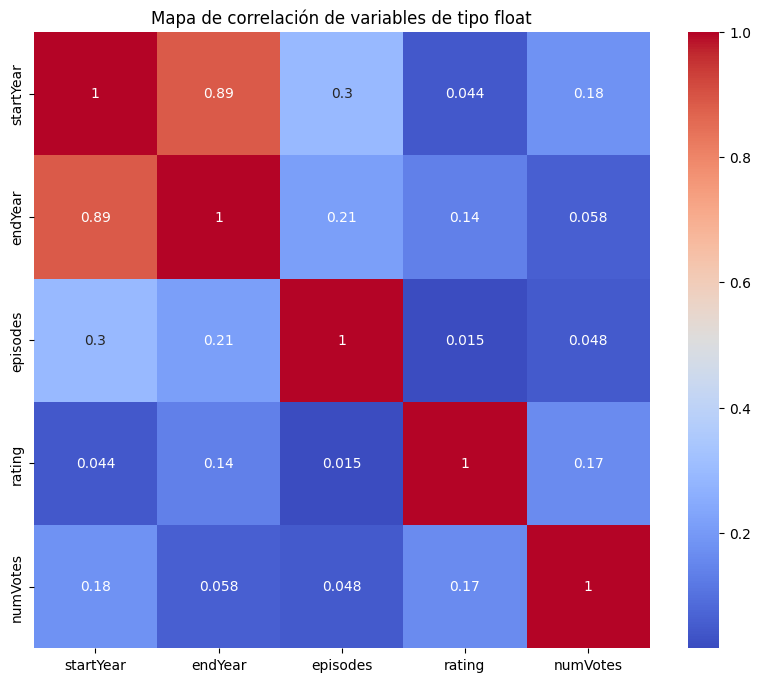

In [ ]:
# Filtrar solo columnas de tipo float
float_columns = df.select_dtypes(include='float').columns
X_float = df[float_columns]  # DataFrame solo con columnas de tipo float

# Calcular matriz de correlación para las variables float
correlation_matrix = X_float.corr().abs()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Mapa de correlación de variables de tipo float")
plt.show()

In [ ]:
# Definir umbral de correlación fuerte
threshold = 0.8

# Identificar pares de variables con correlación fuerte
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold]

print("Pares de variables con correlación fuerte (>|0.8|):", high_corr_pairs)

Pares de variables con correlación fuerte (>|0.8|): [('startYear', 'endYear'), ('endYear', 'startYear')]


In [ ]:
# Eliminar una variable de cada par de alta correlación
variables_to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in variables_to_drop and col2 not in variables_to_drop:
        variables_to_drop.add(col2)

# Crear nuevo DataFrame sin variables con alta correlación
X_float_cleaned = X_float.drop(columns=variables_to_drop)
print("Variables eliminadas debido a alta correlación:", variables_to_drop)

Variables eliminadas debido a alta correlación: {'endYear'}


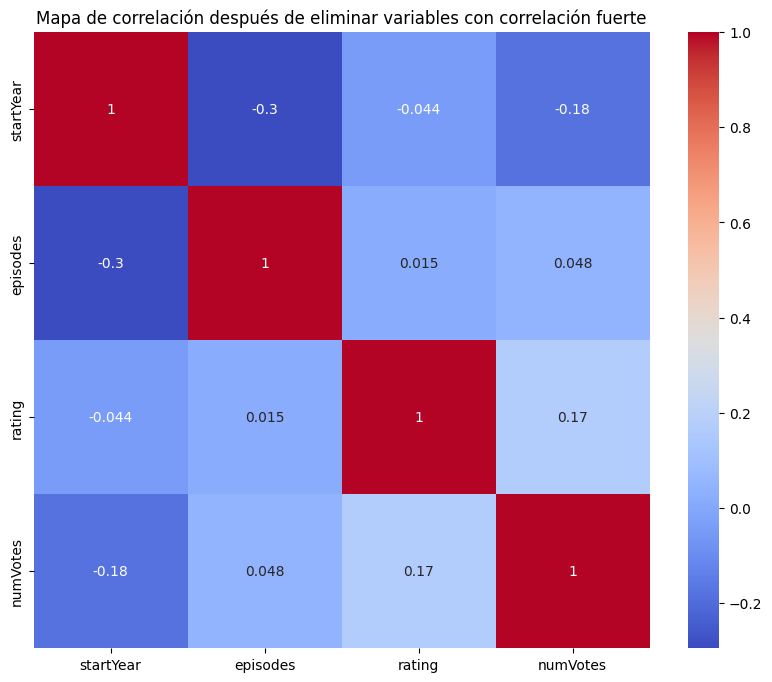

In [ ]:
# Verificar nueva matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(X_float_cleaned.corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Mapa de correlación después de eliminar variables con correlación fuerte")
plt.show()

In [ ]:
# Definir la variable objetivo y las independientes
X = df_clean.select_dtypes(include=['float64']).drop(columns=['type_encoded'], errors='ignore')  # Solo variables float y excluye `type_encoded` si se incluye en X
y = df_clean['type_encoded']

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
X_train.columns

Index(['startYear', 'runtime', 'rating', 'numVotes'], dtype='object')

In [ ]:
feature_names = X_train.columns

# Escalado de datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Crear un clasificador RandomForest
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Aplicar RFE
rfe = RFE(estimator=rf_clf, n_features_to_select=3)  # Seleccionar 3 características después de PCA
X_train_rfe = rfe.fit_transform(X_train_pca, y_train)
X_test_rfe = rfe.transform(X_test_pca)

# Obtener los nombres de las características originales contribuyentes para los componentes seleccionados
components = pca.components_

# Obtener los índices de los componentes principales seleccionados
selected_indices = rfe.support_

# Obtener los nombres de las características originales más importantes para cada componente principal seleccionado
selected_original_features = [feature_names[np.abs(components[i]).argmax()] for i in range(components.shape[0]) if selected_indices[i]]
print("Selected Original Feature Names: ", selected_original_features)

# Entrenar el clasificador RandomForest con las características seleccionadas
rf_clf.fit(X_train_rfe, y_train)

# Predicción y evaluación
y_pred = rf_clf.predict(X_test_rfe)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Selected Original Feature Names:  ['rating', 'startYear', 'runtime']
Accuracy: 0.6946826758147513
Confusion Matrix:
 [[690   0   4   2   3  39   0   9   0   0]
 [  0   0   4   0   0  24   0   1   0   0]
 [  8   0  40   3   0 103   0   6   0   0]
 [ 11   0   9  25   0  37   0   4   0   0]
 [ 19   0   1   1   1  11   0   4   0   0]
 [ 32   1  59  12   2 425   0  18   0   1]
 [  0   0   0   0   0   2   0   0   0   0]
 [ 21   0   6   1   1  47   0  33   1   0]
 [ 18   0   2   0   0   7   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       747
           1       0.00      0.00      0.00        29
           2       0.32      0.25      0.28       160
           3       0.57      0.29      0.38        86
           4       0.14      0.03      0.05        37
           5       0.61      0.77      0.68       550
           6       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# **Resultados de Evaluación**
**Matriz de Confusión:**La matriz de confusión muestra el desempeño del modelo en cada clase. Observamos que las clases 0 y 5 tienen la mayoría de las predicciones correctas, mientras que las otras clases tienen muchos errores.

**Conclusiones del informe de clasificación:**
**Rendimiento General (Accuracy):** La precisión (accuracy) es del 69%, lo cual indica que el modelo ha logrado predecir correctamente el 67% de los ejemplos de prueba (o de validación) con respecto a su valor real.

**Desequilibrio de Clases:** Las clases 1, 2, 3, 4, 6, 7 y 8 tienen precisión y recall bajos, lo cual indica que el modelo no está prediciendo bien estas clases. Esto puede deberse al desbalance en el conjunto de datos.

**Mejora en Clases Dominantes:** Las clases 0 y 5 tienen buenas puntuaciones de precisión y recall, mostrando que el modelo funciona bien para estas clases dominantes.

*Entiendo también que el desbalanceo en cuanto a la proporcion de cada tipo de título debe ser tratado para que frente a una nueva muestra el algoritmo no tenga ese aprendizaje "de memoria" y por ese motivo me clasifique mal el tipo de título. Creo que aún no vimos algún método adecuado para realizar este proceso.*

